# Week5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## a) Import the dataset. 

In [2]:
df=pd.read_csv("jab offer.csv")
df

,cgpa,interactive,practical knowledge,skills,job offer
0,>=9,yes,very good,good,yes
1,>=8,no,good,moderate,yes
2,>=9,no,average,poor,no
3,<8,no,average,good,no
4,>=8,yes,good,moderate,yes
5,>=9,yes,good,moderate,yes
6,<8,yes,good,poor,no
7,>=9,no,very good,good,yes
8,>=8,yes,good,good,yes
9,>=8,yes,average,good,yes


## b) Initiate the implementation by performing data pre-processing steps.. Detail the steps involved in cleaning, handling missing values, and encoding categorical variables. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cgpa                 10 non-null     object
 1   interactive          10 non-null     object
 2   practical knowledge  10 non-null     object
 3   skills               10 non-null     object
 4   job offer            10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [4]:
df.isnull().sum()

cgpa                   0
interactive            0
practical knowledge    0
skills                 0
job offer              0
dtype: int64

In [5]:
df.describe()

,cgpa,interactive,practical knowledge,skills,job offer
count,10,10,10,10,10
unique,3,2,3,3,2
top,>=9,yes,good,good,yes
freq,4,6,5,5,7


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
features=df.iloc[:,:-1]
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df
features=label(features)
features

,cgpa,interactive,practical knowledge,skills
0,2,1,2,0
1,1,0,1,1
2,2,0,0,2
3,0,0,0,0
4,1,1,1,1
5,2,1,1,1
6,0,1,1,2
7,2,0,2,0
8,1,1,1,0
9,1,1,0,0


In [8]:
y=df["job offer"]
y

0    yes
1    yes
2     no
3     no
4    yes
5    yes
6     no
7    yes
8    yes
9    yes
Name: job offer, dtype: object

## c) Develop a Python function or script to fit a Decision Tree algorithm to the training set. Specify the key hyperparameters and configurations involved in training the Decision Tree model. 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2)

In [27]:
X_train

,cgpa,interactive,practical knowledge,skills
3,0,0,0,0
5,2,1,1,1
2,2,0,0,2
4,1,1,1,1
7,2,0,2,0
1,1,0,1,1
6,0,1,1,2
8,1,1,1,0


In [28]:
X_test

,cgpa,interactive,practical knowledge,skills
9,1,1,0,0
0,2,1,2,0


In [29]:
y_train

3     no
5    yes
2     no
4    yes
7    yes
1    yes
6     no
8    yes
Name: job offer, dtype: object

In [30]:
y_test

9    yes
0    yes
Name: job offer, dtype: object

In [31]:
Classifier=DecisionTreeClassifier(criterion="entropy")#to do based on entropy

In [32]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# d) Implement code to predict the test results using the trained Decision Tree model

In [33]:
y_pred=Classifier.predict(X_test)
y_pred

array(['no', 'yes'], dtype=object)

# e) Evaluate the accuracy of the decision tree model on the test set. Generate a confusion matrix to analyze the model's performance. 

In [34]:
Classifier.score(X_test,y_test)

0.5

In [35]:
accuracy_score(y_test,y_pred)

0.5

In [36]:
Classifier.feature_importances_

array([0.51079154, 0.        , 0.48920846, 0.        ])

In [37]:
Classifier.tree_.max_depth

2

In [38]:
from sklearn.metrics import confusion_matrix

<Axes: >

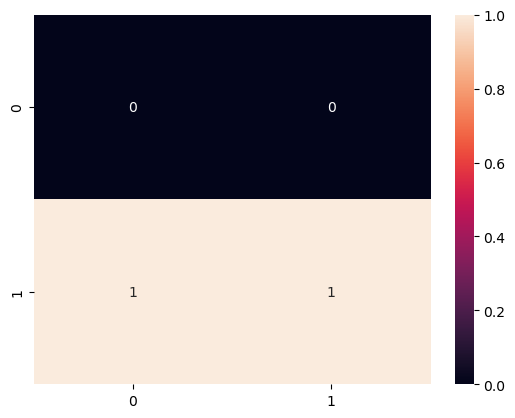

In [39]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# f) Create visualizations to represent the results of the Decision Tree model on the test set. Create visualizations to represent the results of the Decision Tree model on the test set. 

In [41]:
text_representation = tree.export_text(Classifier)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- class: no
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: no
|   |--- feature_0 >  0.50
|   |   |--- class: yes



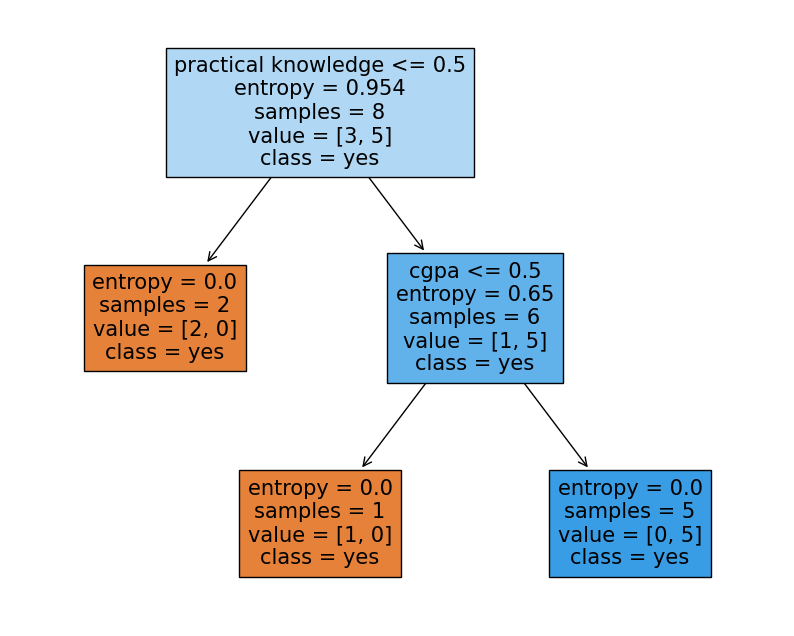

In [40]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(Classifier,feature_names=features.columns,  
                   class_names=df["job offer"],
                   filled=True)
plt.show()

In [28]:
with open('DT2.txt',"w") as f:
    f=tree.export_graphviz(Classifier,out_file=f)